# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1235.
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           5.99e-44
Time:                        14:45:33   Log-Likelihood:                 8.4925
No. Observations:                  50   AIC:                            -8.985
Df Residuals:                      46   BIC:                            -1.337
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9602      0.073     68.366      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.43234381  4.90943041  5.34868087  5.7243547   6.02000105  6.23116148
  6.36610249  6.44445736  6.49400045  6.54608397  6.63048686  6.77052223
  6.9792071   7.25712366  7.59232372  7.96229169  8.33764384  8.68695601
  8.98192645  9.20202575  9.33786977  9.39276138  9.38214789  9.33108302
  9.2701107   9.23024674  9.23788308  9.31045161  9.4535602   9.66007133
  9.91127475 10.17996156 10.43489449 10.64594018 10.78901992 10.85006579
 10.82733191 10.73168135 10.5848013  10.41563996 10.25565043 10.13362305
 10.0709552  10.07813584 10.15302213 10.28119155 10.43831142 10.59413676
 10.7174794  10.78133212]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.75247483 10.59778908 10.33579707 10.00870856  9.67208644  9.381243
  9.17769757  9.0790111   9.07448665  9.12778841]


## Plot comparison

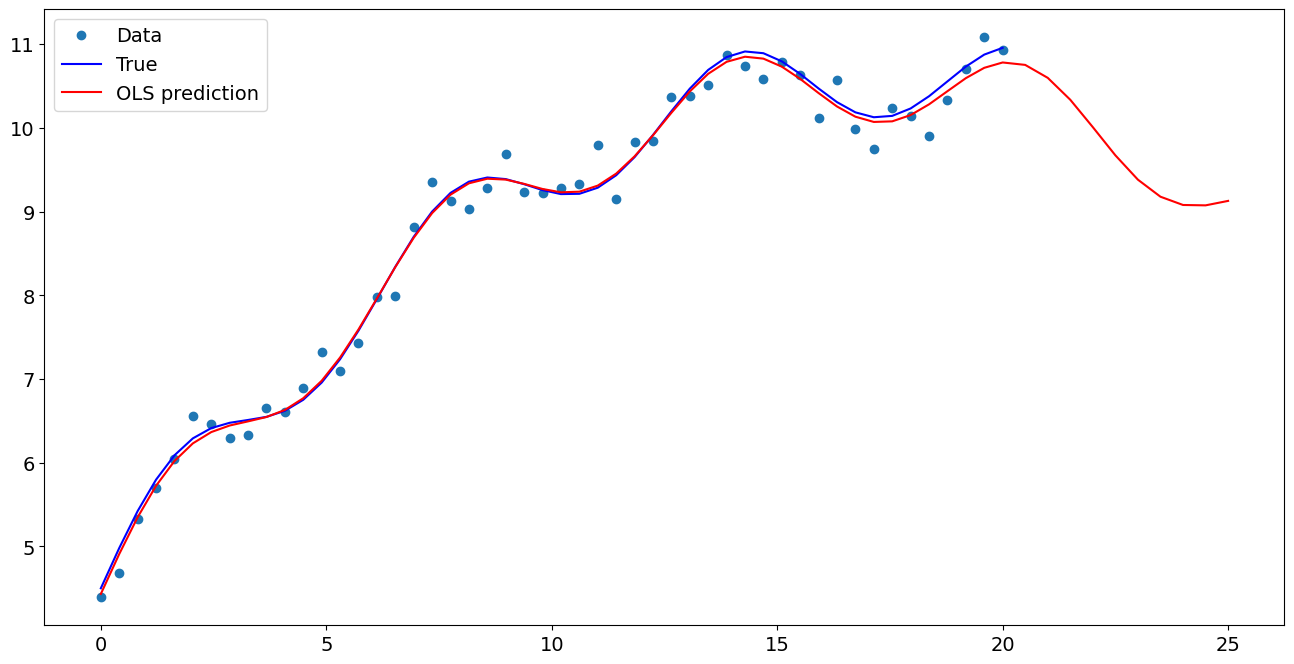

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.960202
x1                  0.507033
np.sin(x1)          0.472310
I((x1 - 5) ** 2)   -0.021114
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.752475
1    10.597789
2    10.335797
3    10.008709
4     9.672086
5     9.381243
6     9.177698
7     9.079011
8     9.074487
9     9.127788
dtype: float64